In [1]:
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd

Omega_M = .3175
Omega_b = .049
h = .6711
n_s = .9624
omega_8 = .834

## The Linear Power Spectrum

In [2]:
df = pd.read_csv("data/linear_pk.txt", delim_whitespace=True, comment='#', names=['k','p'])
df
 

,k,p
0,0.000011,50.204000
1,0.000011,51.180000
2,0.000011,52.174000
3,0.000011,53.188000
4,0.000012,54.222000
...,...,...
879,463.160000,0.000005
880,472.520000,0.000005
881,482.060000,0.000005
882,491.800000,0.000004


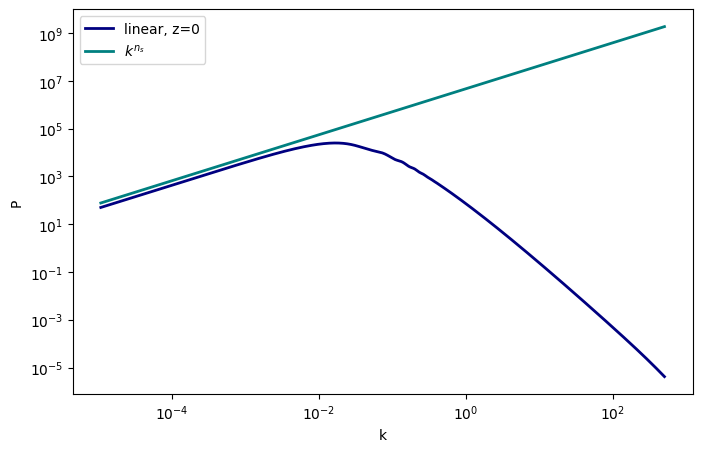

In [3]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('k')
ax.set_ylabel('P')

#plot linear power spectrum at z = 0
ax.plot(df['k'], df['p'], linewidth = 2, color='navy', label = 'linear, z=0')

# plot k**n_s as an approximation at low k
scaling = df['p'][0]/df['k'][0]
ax.plot(df['k'], scaling*df['k']**n_s, linewidth = 2, color='teal', label = '$k^{n_s}$')

ax.legend()

In [4]:
k_eq = df['k'][np.argmax(df['p'])]

print('$k_{eq}$ occurs at k =', round(k_eq,3))

print('')

$k_{eq}$ occurs at k = 0.017



This matches the shape seen in class!


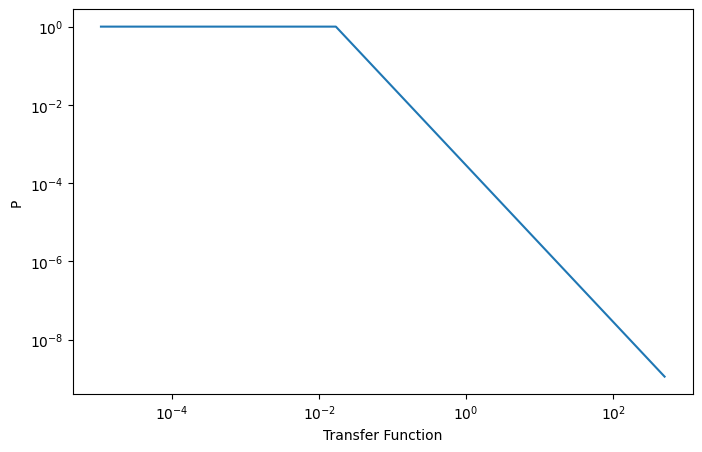

In [5]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Transfer Function')
ax.set_ylabel('P')

# calculate transfer function values
transfer = (k_eq/df['k'])**2
transfer[:np.argmax(df['p'])] = 1

#plot transfer function
ax.plot(df['k'], transfer)

print('This matches the shape seen in class!')

In [6]:
print('CALCULATE SIGMA8')

CALCULATE SIGMA8


# Non-Linear Power Spectrum

In [7]:
z0 = pd.read_csv("data/Pk_m_z=0.txt", delim_whitespace=True, comment='#', names=['k','p'])
zhalf = pd.read_csv("data/Pk_m_z=0.5.txt", delim_whitespace=True, comment='#', names=['k','p'])
z1 = pd.read_csv("data/Pk_m_z=1.txt", delim_whitespace=True, comment='#', names=['k','p'])
z2 = pd.read_csv("data/Pk_m_z=2.txt", delim_whitespace=True, comment='#', names=['k','p'])

lin = pd.DataFrame()
lin['k'] = z0['k']
lin['p'] = np.interp(lin['k'], df['k'], df['p'])

In [8]:
non_lin = {0:z0,\
            .5:zhalf,\
            1:z1,\
            2:z2}

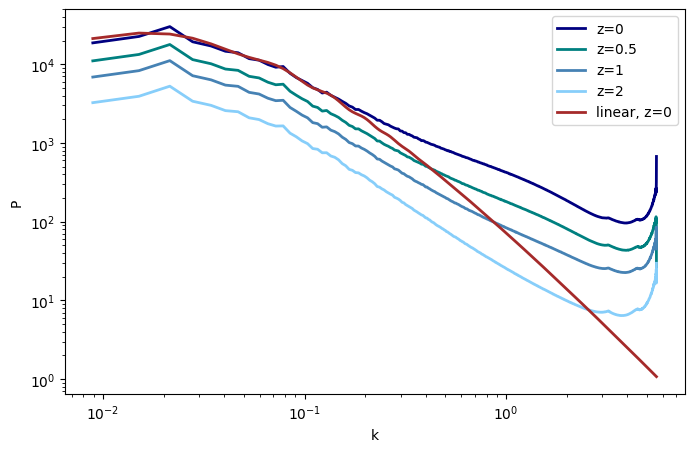

In [9]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('k')
ax.set_ylabel('P')

#plot linear power spectrum at z = 0
colors = {0:'navy',\
            .5:'teal',\
            1:'steelblue',\
            2:'lightskyblue',\
            'lin':'brown'}
for key in non_lin:
    ax.plot(non_lin[key]['k'], non_lin[key]['p'], linewidth = 2, color=colors[key], label = f'z={key}')

ax.plot(lin['k'], lin['p'], linewidth = 2, color='brown', label = 'linear, z=0')

ax.legend()

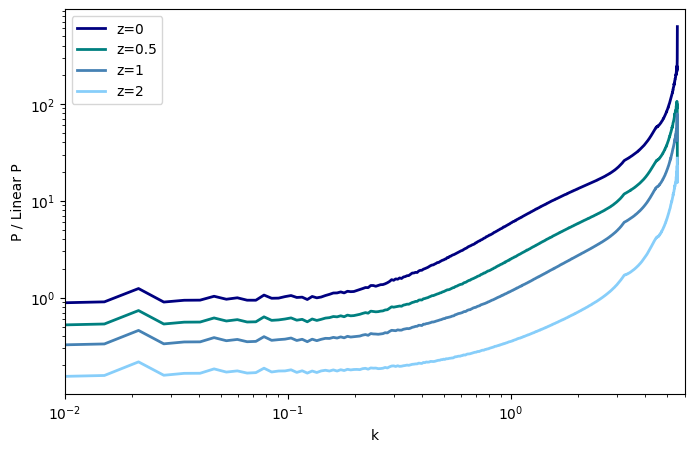

In [10]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('k')
ax.set_ylabel('P / Linear P')

ax.set_xlim([1e-2,6])

#plot linear power spectrum at z = 0
colors = {0:'navy',\
            .5:'teal',\
            1:'steelblue',\
            2:'lightskyblue'}
for key in non_lin:
    ax.plot(non_lin[key]['k'], non_lin[key]['p']/lin['p'], linewidth = 2, color=colors[key], label = f'z={key}')

ax.legend()

This breaks down at k = ~.5, and becomes completely unreasonable at k = ~10. The shape of this graph is caused by the fact that the linear approximation is not reasonable for perturbations on large scales.

The relationship between growth function and power spectrum is given by Baumann eq 5.68, and it reveals that the ratio we were finding above is equivalent to the growth function. This is assuming that the growth function at z=0, D(z=0) is normalized to 1. 

/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_4135/775102534.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.scatter(key, (non_lin[key]['p']/lin['p'])[0], s=15, color='teal')


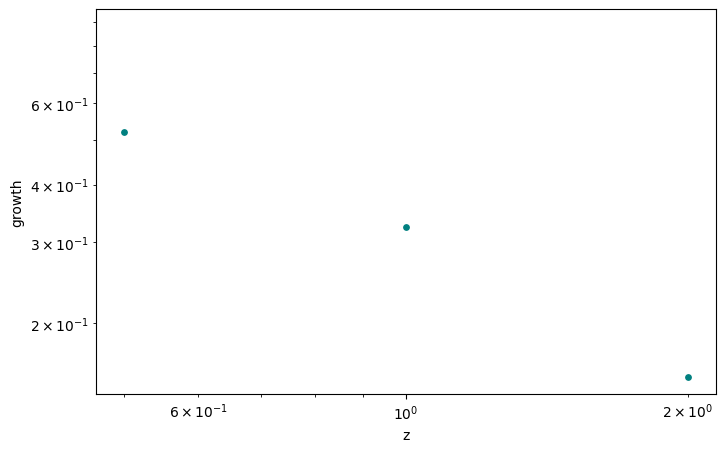

In [11]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('z')
ax.set_ylabel('growth')

#plot growth function
dots = {}
for key in non_lin:
    dots[key] = (non_lin[key]['p']/lin['p'])[0]
    ax.scatter(key, (non_lin[key]['p']/lin['p'])[0], s=15, color='teal')

# Growth Function

In [12]:
def Omega_DE(a):
    # we know:
    # 1 = Omega_m + Omega_DE
    # H^2/H_0^2 = Omega_m * a^-3 + Omega_DE 

    # this allows us to find:
    # Omega_DE = 1 - (Omega_m0 * a^-3)/(Omega_m0*a^-3 + Omega_DE0)

    Omega_m0 = .3175
    Omega_DE0 = .6825
    return 1 - (Omega_m0 * a**-3)/(Omega_m0*a**-3 + Omega_DE0)

/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_4135/4105034652.py:11: RuntimeWarning: divide by zero encountered in scalar power
  return 1 - (Omega_m0 * a**-3)/(Omega_m0*a**-3 + Omega_DE0)
/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_4135/4105034652.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (Omega_m0 * a**-3)/(Omega_m0*a**-3 + Omega_DE0)
/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_4135/4105034652.py:11: RuntimeWarning: overflow encountered in scalar power
  return 1 - (Omega_m0 * a**-3)/(Omega_m0*a**-3 + Omega_DE0)


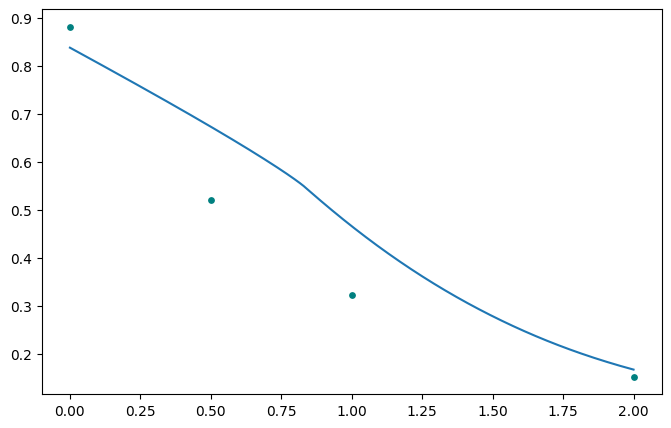

In [13]:
from scipy.integrate import solve_ivp
def g_ode(a,state):
    return[state[1], -(5/2 + 3/2*Omega_DE(a))*state[1] - 3*Omega_DE(a) * state[0]]

zs = np.linspace(2,0.0001,300)
a = 1/(1+zs)
gs = solve_ivp(g_ode, [-5, 0], [1, 0], t_eval=np.log(a)).y[0]
growth = np.flip(gs)#np.multiply(gs,a))

fig,ax = plt.subplots(figsize=(8,5))
ax.plot(zs,growth*30) #normalize
for key in non_lin:
    ax.scatter(key, dots[key], s=15, color='teal')

# Halo Mass Function

In [14]:
halos0 = pd.read_csv("data/halo_z=0.txt", delim_whitespace=True, comment='#')
halos1 = pd.read_csv("data/halo_z=1.txt", delim_whitespace=True, comment='#')

In [15]:
m = np.sum(halos0['Mvir'])/1024**3

print(f"Each particle has mass {m}")

Each particle has mass 18195011514.611538


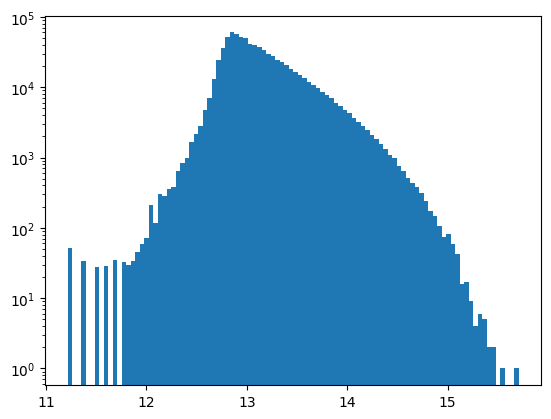

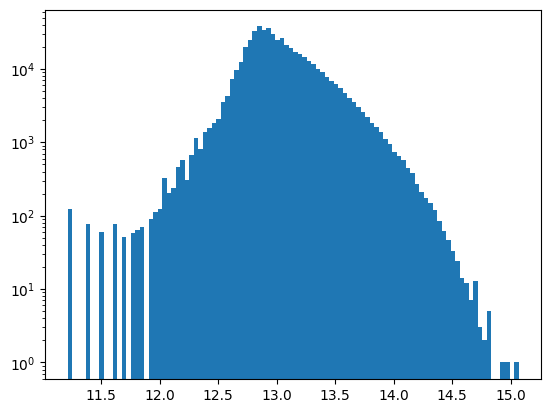

In [16]:
plt.hist(np.log10(halos0['Mvir']),log=True,bins=100)
plt.show()

plt.hist(np.log10(halos1['Mvir']),log=True,bins=100)
plt.show()

A turnaround occurs at m = ~10^13. This is likely due to this being comparable to a particle mass.